In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

from math import ceil
from scipy import optimize, stats
from sympy import *
from tqdm import tqdm

### Часть I. Основы анализа

##### Задача 1. Найдите предел

1. $\displaystyle\lim_{x\to-\infty}\frac{\sqrt{x^2+1}}{x} = 
    \lim_{x\to\infty}-\sqrt{\frac{x^2+1}{x^2}} = 
    \lim_{x\to\infty}-\sqrt{1+\frac{1}{x^2}} = -1$

In [2]:
x = symbols('x')
expr = sqrt(pow(x,2)+1)/x
print(f'Expressions: \n{expr}')

Expressions: 
sqrt(x**2 + 1)/x


In [3]:
limit_expr = limit(expr, x, -oo)
print(f'Limit: {limit_expr}')

Limit: -1


2. $\displaystyle\lim_{n\to+\infty}\frac{(-6)^n-5^{n+1}}{5^n-(-6)^{n+1}} =
    \lim_{n\to+\infty}\frac{(-6)^n/(-6)^{n+1}-5^{n+1}/(-6)^{n+1}}{5^n/(-6)^{n+1}-1} =
    \lim_{n\to+\infty}\frac{-\frac{1}{6}-(-\frac{5}{6})^{n+1}}{-\frac{1}{6}(-\frac{5}{6})^n-1} =$
    
   $\displaystyle= \lim_{n\to+\infty}\frac{1+6(-\frac{5}{6})^{n+1}}{(-\frac{5}{6})^n+6} = 
    \lim_{n\to+\infty}\frac{1+0}{0+6} = 
    \frac{1}{6}$

In [4]:
n = symbols('n')
expr_1 = (1 + 6*pow(5/6,n+1))/(-pow(5/6,n)+6)
expr_2 = (1 - 6*pow(5/6,n+1))/(pow(5/6,n)+6)
print(f'Expressions: \n{expr_1}, \n{expr_2}')

Expressions: 
(6*0.833333333333333**(n + 1) + 1)/(6 - 0.833333333333333**n), 
(1 - 6*0.833333333333333**(n + 1))/(0.833333333333333**n + 6)


In [5]:
limit_expr_1 = limit(expr_1, n, +oo)
limit_expr_2 = limit(expr_2, n, +oo)
print(f'Limits: \n{limit_expr_1}, \n{limit_expr_2}')

Limits: 
1/6, 
1/6


3. $\displaystyle\lim_{n\to+\infty}\frac{1}{n^3}\sum_{k=1}^n{k(k+1)} = 
    \lim_{n\to+\infty}\frac{1}{n^3}(\frac{n^3}{3}+n^2+\frac{2}{3}n) = 
    \lim_{n\to+\infty}\frac{1}{3}+\frac{1}{n}+\frac{2}{3}\frac{1}{n^2} =
    \frac{1}{3}$

In [6]:
k = symbols('k')
expr = Sum(k*(k+1),(k,1,n)).doit()/pow(n,3)
print(f'Expressions: \n{expr}')

Expressions: 
(n**3/3 + n**2 + 2*n/3)/n**3


In [7]:
limit_expr = limit(expr, n, +oo)
print(f'Limit: {limit_expr}')

Limit: 1/3


4. $\displaystyle\lim_{n\to+\infty}\frac{1}{n}\sqrt[n]{(n+1)(n+2)\cdot\dotsm\cdot2n} =
    \lim_{n\to+\infty}\frac{1}{n}\sqrt[n]{\frac{(2n)!}{n!}} {=}^{*^1} 
    \lim_{n\to+\infty}\frac{1}{n}\sqrt[n]{\frac{\sqrt{4\pi n}*(\frac{2n}{e})^{2n}}{\sqrt{2\pi n}*(\frac{n}{e})^{n}}} =
    \lim_{n\to+\infty}\frac{1}{n}\sqrt[n]{{4^n}\sqrt{2}(\frac{n}{e})^{n}} = $
    
   $\displaystyle\lim_{n\to+\infty}\frac{4}{e}\sqrt[n]{\frac{n^n\sqrt{2}}{n^n}} = 
    \lim_{n\to+\infty}\frac{4}{e}2^{\frac{1}{n+2}} = 
    \frac{4}{e}2^0 = \frac{4}{e}$
    
  $*^1$ Формула Стирлинга $\displaystyle\lim_{n\to+\infty}\frac{n!}{\sqrt{2\pi n}(\frac{n}{e})^{n}} = 1 \equiv 
  n! \sim_{n\to+\infty} \sqrt{2\pi n}(\frac{n}{e})^{n}$

In [8]:
expr = pow(factorial(2*n)/factorial(n),1/n)/n
print(expr)

(factorial(2*n)/factorial(n))**(1/n)/n


In [9]:
limit_expr = limit(expr, n, +oo)
print(limit_expr)

4*exp(-1)


##### Задача 2.

Нет, не верно. $\displaystyle\lim_{n\to\infty}f(x)^x\geq\lim_{n\to\infty}h(x)^x$

In [10]:
def dev_sigmoid(x):
    return np.exp(-x)/(1+np.exp(-x))**2

In [11]:
x = np.linspace(-10, 10, num=1000)

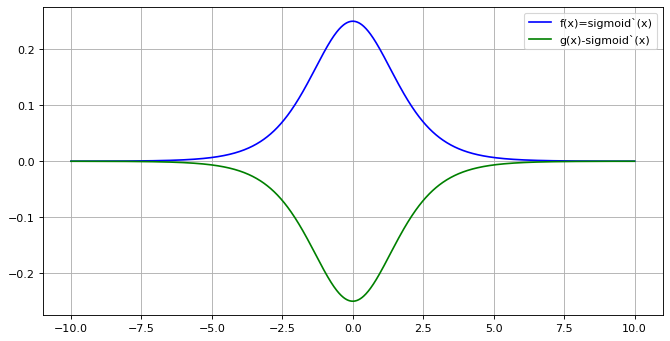

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,5), dpi= 80)
ax.plot(x, dev_sigmoid(x), color='blue', label='f(x)=sigmoid`(x)')
ax.plot(x, -dev_sigmoid(x), color='green', label='g(x)-sigmoid`(x)')
ax.autoscale(enable=True, axis=1, tight=None)
ax.legend()
ax.grid()

In [13]:
x = symbols('x')
f = exp(-x)/(1+exp(-x))**2
g = -exp(-x)/(1+exp(-x))**2
expr_f = f**x
expr_g = g**x

print(f'Functions: \n g={g}, f={f}')
print(f'Expressions: \n g={expr_g}, f={expr_f}')
print(f'lim g^x={limit(expr_g,x,oo)}={limit(expr_f,x,oo)}=lim f^x')

Functions: 
 g=-exp(-x)/(1 + exp(-x))**2, f=exp(-x)/(1 + exp(-x))**2
Expressions: 
 g=(-exp(-x)/(1 + exp(-x))**2)**x, f=(exp(-x)/(1 + exp(-x))**2)**x
lim g^x=0=0=lim f^x


##### Задача 3.

$\sqsupset r(x)=\sin(x),$

$\quad p(x)=\cos(x),$

$\quad q(x)=\cos^2(x)+\sin^2(x)$

In [14]:
x = symbols('x')
r = symbols('r')
p = symbols('p')
q = symbols('q')
r = sin(x)
p = cos(x)
q = cos(x)**2 + sin(x)**2

In [15]:
left = r*sin(x)+p*cos(x)
right = q

In [16]:
left==right

True

In [17]:
left_diff = Derivative(left, x).doit()
right_diff = Derivative(right, x).doit()
if left_diff == right_diff:
    print('The derivatives of both parts of the equality coincide.')
else:
    print('The derivatives are different.')

The derivatives of both parts of the equality coincide.


In [18]:
x = np.linspace(-np.pi, np.pi, num=1000)
y = np.sin(x)**2+np.cos(x)**2

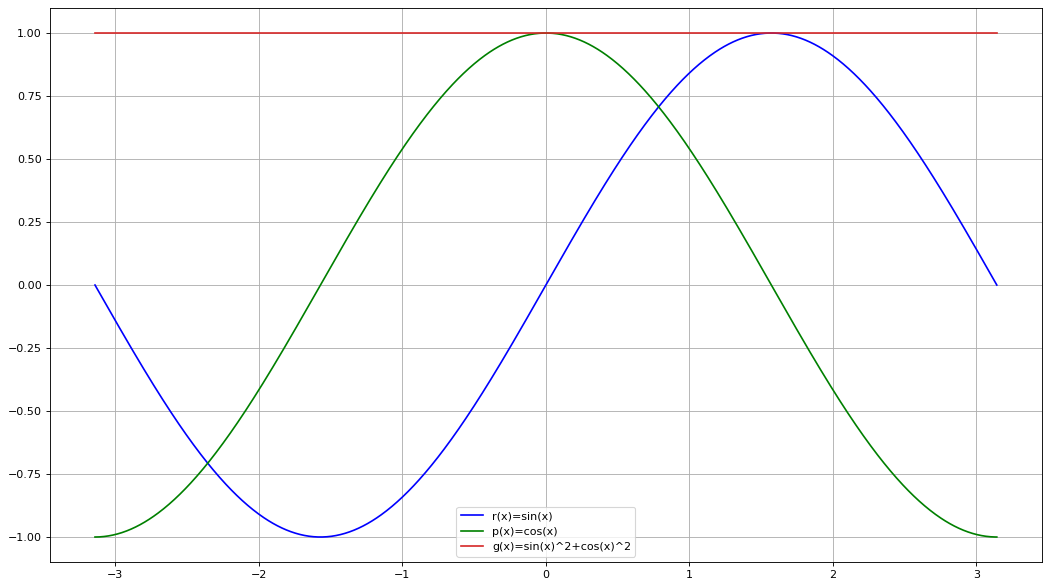

In [19]:
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax.plot(x, np.sin(x), color='blue', label='r(x)=sin(x)')
ax.plot(x, np.cos(x), color='green', label='p(x)=cos(x)')
ax.plot(x, y, color='tab:red', label='g(x)=sin(x)^2+cos(x)^2')
ax.autoscale(enable=True, axis=1, tight=None)
ax.legend()
ax.grid()

##### Задача 4.

In [20]:
x = symbols('x')
f = x / (1 + x**2)**2
print(f'f(x)={f}')

f(x)=x/(x**2 + 1)**2


ряд Маклорена:

$\displaystyle f(x)=f(0)+\frac{f'(0)}{1!}x+\frac{f'(0)}{2!}x^2+\dotsb=\sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n$

In [21]:
f_diff_1 = Derivative(f, x).doit()
print(f'f`(x)={f_diff_1}')
f_diff_2 = Derivative(f_diff_1, x).doit()
print(f'f``(x)={f_diff_2}')
f_diff_3 = Derivative(f_diff_2, x).doit()
print(f'f```(x)={f_diff_3}')
f_diff_4 = Derivative(f_diff_3, x).doit()
print(f'f_4(x)={f_diff_4}')
f_diff_5 = Derivative(f_diff_4, x).doit()
print(f'f_5(x)={f_diff_5}')
f_diff_6 = Derivative(f_diff_5, x).doit()
print(f'f_6(x)={f_diff_6}')
f_diff_7 = Derivative(f_diff_6, x).doit()
print(f'f_7(x)={f_diff_7}')

f`(x)=-4*x**2/(x**2 + 1)**3 + (x**2 + 1)**(-2)
f``(x)=24*x**3/(x**2 + 1)**4 - 12*x/(x**2 + 1)**3
f```(x)=-192*x**4/(x**2 + 1)**5 + 144*x**2/(x**2 + 1)**4 - 12/(x**2 + 1)**3
f_4(x)=1920*x**5/(x**2 + 1)**6 - 1920*x**3/(x**2 + 1)**5 + 360*x/(x**2 + 1)**4
f_5(x)=-23040*x**6/(x**2 + 1)**7 + 28800*x**4/(x**2 + 1)**6 - 8640*x**2/(x**2 + 1)**5 + 360/(x**2 + 1)**4
f_6(x)=322560*x**7/(x**2 + 1)**8 - 483840*x**5/(x**2 + 1)**7 + 201600*x**3/(x**2 + 1)**6 - 20160*x/(x**2 + 1)**5
f_7(x)=-5160960*x**8/(x**2 + 1)**9 + 9031680*x**6/(x**2 + 1)**8 - 4838400*x**4/(x**2 + 1)**7 + 806400*x**2/(x**2 + 1)**6 - 20160/(x**2 + 1)**5


In [22]:
print(f'{f_diff_1.subs(Symbol("x"), 0)/factorial(1)}, {f_diff_2.subs(Symbol("x"), 0)/factorial(2)},'
      f' {f_diff_3.subs(Symbol("x"), 0)/factorial(3)}, {f_diff_4.subs(Symbol("x"), 0)//factorial(4)},'
      f' {f_diff_5.subs(Symbol("x"), 0)//factorial(5)}, {f_diff_6.subs(Symbol("x"), 0)//factorial(6)},'
      f' {f_diff_7.subs(Symbol("x"), 0)//factorial(7)}')

1, 0, -2, 0, 3, 0, -4


In [23]:
series(f, x, 0, 8, "+")

x - 2*x**3 + 3*x**5 - 4*x**7 + O(x**8)

$\displaystyle \frac{x}{(x^2+1)^2} = \sum_{n=0}^{\infty} (-1)^{n+1}nx^{2n-1}$

##### Задача 5.

При рассмотрении сходимости ряда $\displaystyle \sum_{n=1}^{+\infty} \ln\frac{n^2+1}{n^2+n+1}$ в первом случае в знаменателе отбросили $n$, чего нельзя было делать так как только отбрасывание конечного числа членов ряда (или добавление конечного числа новых) не влияет на сходимость или расходимость ряда. В связи с этим была допущена ошибка, которая привела к сходимости данного ряда. Во втором же случае рассуждения верные. Этим и вызвано различие в ответах.

In [24]:
series = Sum(ln((n**2 + 1)/(n**2+n+1)),(n,1,+oo))

In [25]:
series.doit()

Sum(log((n**2 + 1)/(n**2 + n + 1)), (n, 1, oo))

In [26]:
series.is_convergent()

False

##### Задача 6.

$\int (1+x+x\ln x)x^x\mathrm{d}x=\int x^x\mathrm{d}x+\int x^{x+1}\mathrm{d}x+\int x^{x+1}\ln x\mathrm{d}x=
x^{x+1}+\int x^{x+1}(\ln x+1)\mathrm{d}x = x^{x+1}+C$

In [27]:
x = Symbol('x')

integrate((1 + x + x*ln(x))*x**x, x)

x*x**x

##### Задача 7.

$\displaystyle\int_{0}^{\pi} \sin(x)\sin(nx)\mathrm{d}x$

In [28]:
integrate(sin(x)*sin(n*x),x).doit()

Piecewise((-x*sin(x)**2/2 - x*cos(x)**2/2 + sin(x)*cos(x)/2, Eq(n, -1)), (x*sin(x)**2/2 + x*cos(x)**2/2 - sin(x)*cos(x)/2, Eq(n, 1)), (-n*sin(x)*cos(n*x)/(n**2 - 1) + sin(n*x)*cos(x)/(n**2 - 1), True))

In [29]:
integrate(sin(x)*sin(n*x), x).subs(Symbol("x"), pi)-integrate(sin(x)*sin(n*x), x).subs(Symbol("x"), 0)

Piecewise((-pi/2, Eq(n, -1)), (pi/2, Eq(n, 1)), (-sin(pi*n)/(n**2 - 1), True))

### Часть II. Комбинаторика и теоретико-числовые методы

##### Задача 1.

In [30]:
def binary(n, k):
    if k == 0:  # no bits set
        yield '0' * n
    elif n == k:  # all bits set
        yield '1' * k
    else:
        assert n > k > 0
        for bits in binary(n - 1, k):
            yield '0' + bits
        for bits in binary(n - 1, k - 1):
            yield '1' + bits

In [31]:
m = 7
k = 2
l = int(m/k)*(k-1)+m%k+1
print(l)
for bits in binary(m, l):
    print(*bits)

5
0 0 1 1 1 1 1
0 1 0 1 1 1 1
0 1 1 0 1 1 1
0 1 1 1 0 1 1
0 1 1 1 1 0 1
0 1 1 1 1 1 0
1 0 0 1 1 1 1
1 0 1 0 1 1 1
1 0 1 1 0 1 1
1 0 1 1 1 0 1
1 0 1 1 1 1 0
1 1 0 0 1 1 1
1 1 0 1 0 1 1
1 1 0 1 1 0 1
1 1 0 1 1 1 0
1 1 1 0 0 1 1
1 1 1 0 1 0 1
1 1 1 0 1 1 0
1 1 1 1 0 0 1
1 1 1 1 0 1 0
1 1 1 1 1 0 0


Минимальное количество единиц, которые должна содержать последовательность бит длины $n$, чтобы при этом обязательно нашлась подпоследовательность из m идущих подряд единиц равна: $[n/m]\cdot(m-1)+\{n/m\}+1$

##### Задача 2.

Из условие задачи следует, что надо выбират только четное число чисел. Т.е. 2, 4 и 6.Если выбирать шесть чисел, то три нечётных числа могут выбраны $C^3_{50}$ способами и три чётных числа так же $C^3_{50}$. Анологично в остальных случаях. Следовательно ответ $\displaystyle\sum_{k=2,4,6} (C^{\frac{k}{2}}_{50})^2$

##### Задача 3.

1. Максимальное число ребер, которое можно удалить из $G_n$, чтобы граф остался связным равно $\displaystyle\frac{n(n-1)}{2}-(n-1)=\frac{(n-1)(n-2)}{2}$, соответсвенно для $G_{101}$ их количество равно $4950$.

2. Число рёбер в полном двудольном графе равно $n_1\cdot n_2,\quad n_1+n_2=n$

In [32]:
def max_edges(n):
    mul = 0
    for n_1 in range(1,n//2+1):
        temp = (n-n_1)*n_1
        if temp > mul:
            mul = temp
            mul_n_1 = n_1
    return mul_n_1, n-mul_n_1
def num_edges(n):
    n_1, n_2 = max_edges(n)
    return int(n*(n-1)/2)-n_1*n_2

In [33]:
print(num_edges(101))

2500


Минимальное число ребер, которое можно удалить из $G_{101}$, чтобы граф стал двудольным равно 
$\displaystyle\frac{n(n-1)}{2}-n_1\cdot n_2=2500$.

##### Задача 4.

$\sphericalangle\quad f(n)=(n-1)^{n-1}+n^n+(n+1)^{n+1}, \quad\rceil n\vdots3\implies n^n\vdots3$

Распишем через бином Ньютона $(n-1)^{n-1}$ и $(n+1)^{n+1}$:

$\displaystyle(n-1)^{n-1}=\sum_{k=0}^{n-1} C^{k}_{n-1}n^k\cdot(-1)^{n-1-k}=(-1)^{n-1}+\sum_{k=1}^{n-1} C^{k}_{n-1}n^k\cdot(-1)^{n-1-k}\equiv(-1)^{n-1}\mod3$, т.к. $n\vdots3$

$\displaystyle(n+1)^{n+1}=\sum_{k=0}^{n+1} C^{k}_{n+1}n^k\cdot1^{n+1-k}=1+\sum_{k=1}^{n+1} C^{k}_{n+1}n^k\equiv1\mod3$, т.к. $n\vdots3$

$\displaystyle f(n) = (-1)^{n-1}+\sum_{k=1}^{n-1} C^{k}_{n-1}n^k\cdot(-1)^{n-1-k}+n^n+1+\sum_{k=1}^{n+1} C^{k}_{n+1}n^k\equiv1+(-1)^{n-1}\mod3$



$f(777)\equiv1+(-1)^{777-1}mod3$

$f(777)\equiv2mod3$

Следовательно $f(777)=776^{776}+777^{777}+778^{778}$ не делится нацело на 3.

##### Задача 5.

$\displaystyle\sum_{k=1}^n{k(k+1)} = (\frac{n^3}{3}+n^2+\frac{2}{3}n)$

$n=999$

$\frac{n^3}{3}$ на конце 3, 

$n^2$ на конце 1, 

$\frac{2}{3}n$ на конце 6

Следовательно 3+1+6=10 на конце 0

In [34]:
k=Symbol('k')
Sum(k*(k+1),(k,1,999)).doit()

333333000

##### Задача 6.

$(n^{100} − 1)^{100}(n^{101} + 1)^{101}\equiv(-1)^{100}\cdot1^{101}=1\mod n$

Следовательно нужно прибавить или $(-1)$ или $(n-1)$

##### Задача 7.

$5\cdot2^{3n-2}+3^{3n-1}=5\cdot2^{3(n-1)+1}+3^{3(n-1)+2}=10\cdot8^{n-1}+9\cdot27^{n-1}=(19-9)\cdot8^{n-1}+9\cdot27^{n-1}=$
$=19\cdot8^{n-1}+9\cdot(27^{n-1}-8^{n-1})=19\cdot8^{n-1}+9\cdot19\cdot(27^{n-2}+\cdots+8^{n-2})\equiv0\mod19$

##### Задача 8.

$x=97^{256}\mod{765}$

Для решения задачи воспользуемся алгоритмом быстрого возведения в степень по модулю.

In [35]:
import re

def dec_to_bin_inverted(degree):
    b = [int(i) for i in list(re.split('0b', bin(degree))[1])][::-1]
    return b, len(b)


def equation_solution(a_0, degree, mod):
    a = [a_0]
    b, len_b = dec_to_bin_inverted(degree)
    for i in range(len_b-1):
        a_i = (a[i]**2)%mod
        a.append(a_i)
    return sum([a*b for a, b in zip(a, b)])

In [36]:
dec_to_bin_inverted(256)


([0, 0, 0, 0, 0, 0, 0, 0, 1], 9)

In [37]:
print(f'x={equation_solution(97, 256, 765)}')

x=511


#### Задача 9.

$n=p_1^{\alpha}\cdot p_2^{\beta}\cdot p_3^{\gamma}$

$\displaystyle1080\cdot n=1463\cdot\varphi(n)$

$\displaystyle1080\cdot\not{n}=1463\cdot\not{n}\cdot(1-\frac{1}{p_1})\cdot(1-\frac{1}{p_2})\cdot\dotsm\cdot(1-\frac{1}{p_k})$

$\displaystyle\frac{(p_1-1)\cdot(p_2-1)\cdot\dotsm\cdot(p_k-1)}{p_1\cdot p_2\cdot\dotsm\cdot p_k}=\frac{1080}{1463}$

$\displaystyle\frac{(p_1-1)\cdot(p_2-1)\cdot\dotsm\cdot(p_k-1)}{p_1\cdot p_2\cdot\dotsm\cdot p_k}=\frac{6\cdot10\cdot18}{7\cdot11\cdot19}\implies p_1=7,\quad p_2=11,\quad p_3=19$

In [38]:
def calc_n(p_1, p_2, p_3, s):
    n, n_index = [], []
    for alpha in range(1,4):
        for beta in range(1,4):
            for gamma in range(1,4):
                n.append([p_1**alpha*p_2**beta*p_3**gamma, (alpha, beta, gamma)])
    n.sort(key = lambda row: row[0])
    for i, elem in enumerate(n):
        n_index.append([i+1,elem])
    return n_index[s-1]

In [39]:
answer = calc_n(7, 11, 19, 9)

In [40]:
print(f's_{answer[0]}=p1^{answer[1][1][0]}*p2^{answer[1][1][1]}*p3^{answer[1][1][2]}={answer[1][0]}')

s_9=p1^1*p2^2*p3^2=305767


### Часть III. Вычисления

#### Задача 1.

$ A_{n\times n} = 
 \begin{pmatrix}
  \alpha & \beta & \cdots & \beta \\
  \beta & \alpha & \cdots & \beta \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \beta & \beta & \cdots & \alpha
 \end{pmatrix}$ $,\quad A^{-1}=?$

In [41]:
# Initialization matrix
def init_matrix(n, a, b):
    return np.full((n,n), b) - np.eye(n)*(b-a)

# Get transpose matrix
def transpose_matrix(matrix):
    return list(map(list,zip(*matrix)))

# Get matrix minor
def get_matrix_minor(matrix, i, j):
    return [row[:j] + row[j+1:] for row in (matrix[:i] + matrix[i+1:])]

# Get matrix determinant
def get_matrix_deternminant(matrix):
    if len(matrix) == 2:
        return matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]
    determinant = 0
    for c in range(len(matrix)):
        determinant += ((-1)**c)*matrix[0][c]*get_matrix_deternminant(get_matrix_minor(matrix,0,c))
    return determinant

# Get inverse matrix
def get_inverse_matrix(n, a, b):
    matrix = init_matrix(n, a, b).tolist()
    determinant = get_matrix_deternminant(matrix)
    if len(matrix) == 2:
        return [[matrix[1][1]/determinant, -1*matrix[0][1]/determinant],
                [-1*matrix[1][0]/determinant, matrix[0][0]/determinant]]
    #get cofactors matrix
    cofactors = []
    for r in range(len(matrix)):
        cofactorRow = []
        for c in range(len(matrix)):
            minor = get_matrix_minor(matrix, r, c)
            cofactorRow.append(((-1)**(r+c)) * get_matrix_deternminant(minor))
        cofactors.append(cofactorRow)
    cofactors = transpose_matrix(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors

In [42]:
init_matrix(5, 14, 31)

array([[14., 31., 31., 31., 31.],
       [31., 14., 31., 31., 31.],
       [31., 31., 14., 31., 31.],
       [31., 31., 31., 14., 31.],
       [31., 31., 31., 31., 14.]])

In [43]:
%%time
np.array(get_inverse_matrix(5, 14, 31))

Wall time: 1e+03 µs


array([[-0.04560955,  0.01321398,  0.01321398,  0.01321398,  0.01321398],
       [ 0.01321398, -0.04560955,  0.01321398,  0.01321398,  0.01321398],
       [ 0.01321398,  0.01321398, -0.04560955,  0.01321398,  0.01321398],
       [ 0.01321398,  0.01321398,  0.01321398, -0.04560955,  0.01321398],
       [ 0.01321398,  0.01321398,  0.01321398,  0.01321398, -0.04560955]])

In [44]:
%%time
np.linalg.inv(init_matrix(5, 14, 31))

Wall time: 846 µs


array([[-0.04560955,  0.01321398,  0.01321398,  0.01321398,  0.01321398],
       [ 0.01321398, -0.04560955,  0.01321398,  0.01321398,  0.01321398],
       [ 0.01321398,  0.01321398, -0.04560955,  0.01321398,  0.01321398],
       [ 0.01321398,  0.01321398,  0.01321398, -0.04560955,  0.01321398],
       [ 0.01321398,  0.01321398,  0.01321398,  0.01321398, -0.04560955]])

#### Задача 2.

In [45]:
def f(x):
    return x + 10**35 * 10**(-(8*x**(0.3) + 0.9*x+32))

solution = optimize.minimize_scalar(f)
print(solution)

     fun: 0.16483667631708415
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 23
     nit: 19
 success: True
       x: 0.12585224797201305


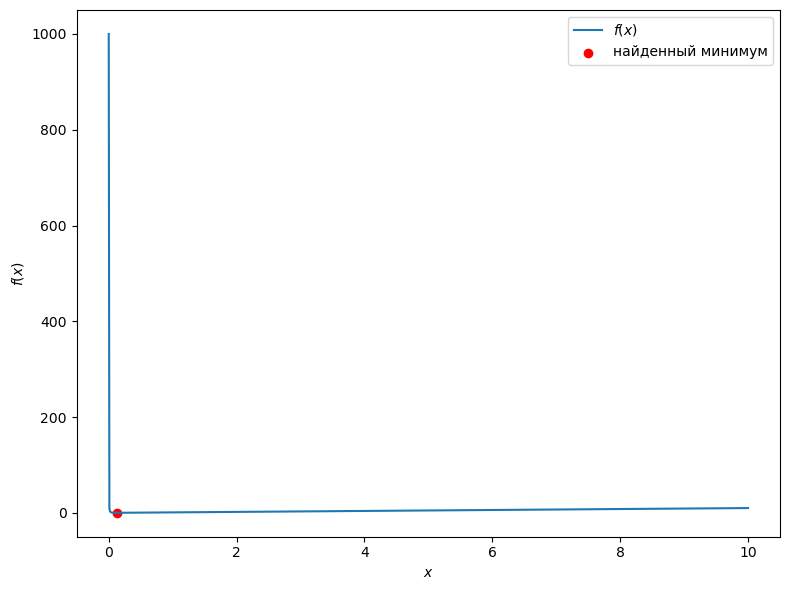

In [46]:
x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots(figsize=(8, 6), layout="tight")
ax.plot(x, f(x), label=r"$f(x)$")
ax.scatter(solution.x, solution.fun, color="red", label="найденный минимум")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.legend()

Для решения задачи, без использования сторонних оптимизаторов, реализуем программный градиентный спуск

In [47]:
x = symbols('x')
A = symbols('A')
a = symbols('a')
b = symbols('b')
g = symbols('g')
s = symbols('s')

f = x + A*10**(-(a*x**(1-b)+g*x+s))
f

10**(-a*x**(1 - b) - g*x - s)*A + x

In [48]:
f_diff = Derivative(f, x).doit()
f_diff

10**(-a*x**(1 - b) - g*x - s)*A*(-a*x**(1 - b)*(1 - b)/x - g)*log(10) + 1

In [49]:
min_fun = []
# первоначальное точка
start_point = 0.15
# размер шага(learning rate)
learn_r = 0.0000001
# установка первоначальной точности
precision = 0.00001
for A in tqdm(range(10**35, 10**50, 10**50)):
    for a in range(1, 10):
        for b in np.arange(0.1, 1, 0.2):
            for g in np.arange(0.1, 1, 0.2):
                for s in range(0, 50, 2):
                    # функция градиента
                    gr_func = lambda x: 1 + A*(-(a*(1-b)*x**(1-b))/x-g)*np.log(10)*10**(-(a*x**(1-b)+g*x+s))
                    # количество итерация
                    n = 1000000
                    next_point = start_point
                    iter_ = 0
                    for i in range(n):
                        current_point = next_point
                        # движение в негативную сторону вычисляемого градиента
                        next_point = current_point - learn_r*gr_func(current_point)
                        iter_ += 1
                        if(abs(current_point - next_point) <= precision):
                            break
                    if iter_ > 100:
                        print(f'fmin={next_point:2.1e}, iter={iter_},'
                              f'A={A:1.1e}, a={a}, b={b:.1f}, g={g:.1f}, s={s}')
                        min_fun.append([next_point, A, a, b, g, s])

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

fmin=5.6e+00, iter=49521,A=1.0e+35, a=1, b=0.1, g=0.1, s=28
fmin=3.4e+00, iter=46718,A=1.0e+35, a=1, b=0.1, g=0.1, s=30
fmin=1.3e+00, iter=38330,A=1.0e+35, a=1, b=0.1, g=0.1, s=32
fmin=4.7e+00, iter=39727,A=1.0e+35, a=1, b=0.1, g=0.3, s=28
fmin=2.8e+00, iter=37974,A=1.0e+35, a=1, b=0.1, g=0.3, s=30
fmin=1.1e+00, iter=32292,A=1.0e+35, a=1, b=0.1, g=0.3, s=32
fmin=4.0e+00, iter=33152,A=1.0e+35, a=1, b=0.1, g=0.5, s=28
fmin=2.5e+00, iter=32032,A=1.0e+35, a=1, b=0.1, g=0.5, s=30
fmin=1.0e+00, iter=27892,A=1.0e+35, a=1, b=0.1, g=0.5, s=32
fmin=3.5e+00, iter=28252,A=1.0e+35, a=1, b=0.1, g=0.7, s=28
fmin=2.2e+00, iter=27723,A=1.0e+35, a=1, b=0.1, g=0.7, s=30
fmin=9.2e-01, iter=24545,A=1.0e+35, a=1, b=0.1, g=0.7, s=32
fmin=3.1e+00, iter=23941,A=1.0e+35, a=1, b=0.1, g=0.9, s=28
fmin=2.0e+00, iter=24450,A=1.0e+35, a=1, b=0.1, g=0.9, s=30
fmin=8.4e-01, iter=21914,A=1.0e+35, a=1, b=0.1, g=0.9, s=32
fmin=7.9e+00, iter=85462,A=1.0e+35, a=1, b=0.3, g=0.1, s=28
fmin=4.1e+00, iter=69719,A=1.0e+35, a=1,

fmin=1.4e+01, iter=133673,A=1.0e+35, a=2, b=0.9, g=0.3, s=26
fmin=8.0e+00, iter=125580,A=1.0e+35, a=2, b=0.9, g=0.3, s=28
fmin=2.5e+00, iter=82526,A=1.0e+35, a=2, b=0.9, g=0.3, s=30
fmin=9.2e+00, iter=75397,A=1.0e+35, a=2, b=0.9, g=0.5, s=26
fmin=5.4e+00, iter=77160,A=1.0e+35, a=2, b=0.9, g=0.5, s=28
fmin=2.0e+00, iter=58055,A=1.0e+35, a=2, b=0.9, g=0.5, s=30
fmin=4.2e+00, iter=55803,A=1.0e+35, a=2, b=0.9, g=0.7, s=28
fmin=1.7e+00, iter=44688,A=1.0e+35, a=2, b=0.9, g=0.7, s=30
fmin=3.4e+00, iter=43750,A=1.0e+35, a=2, b=0.9, g=0.9, s=28
fmin=1.4e+00, iter=36331,A=1.0e+35, a=2, b=0.9, g=0.9, s=30
fmin=1.3e+00, iter=15332,A=1.0e+35, a=3, b=0.1, g=0.1, s=30
fmin=5.6e-01, iter=13115,A=1.0e+35, a=3, b=0.1, g=0.1, s=32
fmin=1.2e+00, iter=14243,A=1.0e+35, a=3, b=0.1, g=0.3, s=30
fmin=5.3e-01, iter=12287,A=1.0e+35, a=3, b=0.1, g=0.3, s=32
fmin=1.1e+00, iter=13302,A=1.0e+35, a=3, b=0.1, g=0.5, s=30
fmin=5.1e-01, iter=11556,A=1.0e+35, a=3, b=0.1, g=0.5, s=32
fmin=1.1e+00, iter=12480,A=1.0e+35, a=

fmin=4.9e+00, iter=68547,A=1.0e+35, a=4, b=0.9, g=0.5, s=26
fmin=1.9e+00, iter=47218,A=1.0e+35, a=4, b=0.9, g=0.5, s=28
fmin=2.6e-01, iter=7348,A=1.0e+35, a=4, b=0.9, g=0.5, s=30
fmin=3.8e+00, iter=50367,A=1.0e+35, a=4, b=0.9, g=0.7, s=26
fmin=1.6e+00, iter=37449,A=1.0e+35, a=4, b=0.9, g=0.7, s=28
fmin=2.6e-01, iter=7167,A=1.0e+35, a=4, b=0.9, g=0.7, s=30
fmin=3.2e+00, iter=39884,A=1.0e+35, a=4, b=0.9, g=0.9, s=26
fmin=1.4e+00, iter=31052,A=1.0e+35, a=4, b=0.9, g=0.9, s=28
fmin=2.5e-01, iter=6924,A=1.0e+35, a=4, b=0.9, g=0.9, s=30
fmin=7.7e-01, iter=8914,A=1.0e+35, a=5, b=0.1, g=0.1, s=30
fmin=3.7e-01, iter=7575,A=1.0e+35, a=5, b=0.1, g=0.1, s=32
fmin=7.4e-01, iter=8533,A=1.0e+35, a=5, b=0.1, g=0.3, s=30
fmin=3.6e-01, iter=7270,A=1.0e+35, a=5, b=0.1, g=0.3, s=32
fmin=7.2e-01, iter=8184,A=1.0e+35, a=5, b=0.1, g=0.5, s=30
fmin=3.5e-01, iter=6985,A=1.0e+35, a=5, b=0.1, g=0.5, s=32
fmin=6.9e-01, iter=7863,A=1.0e+35, a=5, b=0.1, g=0.7, s=30
fmin=3.4e-01, iter=6720,A=1.0e+35, a=5, b=0.1, g=0

fmin=1.6e+00, iter=32392,A=1.0e+35, a=6, b=0.9, g=0.7, s=26
fmin=3.7e-01, iter=10479,A=1.0e+35, a=6, b=0.9, g=0.7, s=28
fmin=3.0e+00, iter=36363,A=1.0e+35, a=6, b=0.9, g=0.9, s=24
fmin=1.4e+00, iter=27280,A=1.0e+35, a=6, b=0.9, g=0.9, s=26
fmin=3.6e-01, iter=9901,A=1.0e+35, a=6, b=0.9, g=0.9, s=28
fmin=5.6e-01, iter=6207,A=1.0e+35, a=7, b=0.1, g=0.1, s=30
fmin=2.8e-01, iter=5080,A=1.0e+35, a=7, b=0.1, g=0.1, s=32
fmin=5.4e-01, iter=6020,A=1.0e+35, a=7, b=0.1, g=0.3, s=30
fmin=2.7e-01, iter=4916,A=1.0e+35, a=7, b=0.1, g=0.3, s=32
fmin=5.3e-01, iter=5843,A=1.0e+35, a=7, b=0.1, g=0.5, s=30
fmin=2.6e-01, iter=4759,A=1.0e+35, a=7, b=0.1, g=0.5, s=32
fmin=5.2e-01, iter=5677,A=1.0e+35, a=7, b=0.1, g=0.7, s=30
fmin=2.6e-01, iter=4608,A=1.0e+35, a=7, b=0.1, g=0.7, s=32
fmin=5.1e-01, iter=5520,A=1.0e+35, a=7, b=0.1, g=0.9, s=30
fmin=2.5e-01, iter=4464,A=1.0e+35, a=7, b=0.1, g=0.9, s=32
fmin=8.0e-01, iter=7583,A=1.0e+35, a=7, b=0.3, g=0.1, s=28
fmin=4.7e-01, iter=6272,A=1.0e+35, a=7, b=0.3, g=0.1

fmin=5.7e-01, iter=5246,A=1.0e+35, a=9, b=0.3, g=0.3, s=28
fmin=3.4e-01, iter=4352,A=1.0e+35, a=9, b=0.3, g=0.3, s=30
fmin=5.6e-01, iter=5092,A=1.0e+35, a=9, b=0.3, g=0.5, s=28
fmin=3.3e-01, iter=4244,A=1.0e+35, a=9, b=0.3, g=0.5, s=30
fmin=5.5e-01, iter=4948,A=1.0e+35, a=9, b=0.3, g=0.7, s=28
fmin=3.3e-01, iter=4141,A=1.0e+35, a=9, b=0.3, g=0.7, s=30
fmin=5.3e-01, iter=4811,A=1.0e+35, a=9, b=0.3, g=0.9, s=28
fmin=3.2e-01, iter=4043,A=1.0e+35, a=9, b=0.3, g=0.9, s=30
fmin=4.7e-01, iter=5619,A=1.0e+35, a=9, b=0.5, g=0.1, s=28
fmin=2.3e-01, iter=3401,A=1.0e+35, a=9, b=0.5, g=0.1, s=30
fmin=4.5e-01, iter=5424,A=1.0e+35, a=9, b=0.5, g=0.3, s=28
fmin=2.3e-01, iter=3302,A=1.0e+35, a=9, b=0.5, g=0.3, s=30
fmin=4.4e-01, iter=5243,A=1.0e+35, a=9, b=0.5, g=0.5, s=28
fmin=2.2e-01, iter=3207,A=1.0e+35, a=9, b=0.5, g=0.5, s=30
fmin=4.3e-01, iter=5074,A=1.0e+35, a=9, b=0.5, g=0.7, s=28
fmin=2.2e-01, iter=3114,A=1.0e+35, a=9, b=0.5, g=0.7, s=30
fmin=4.3e-01, iter=4917,A=1.0e+35, a=9, b=0.5, g=0.9, s=

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [02:05<00:00, 125.82s/it]

fmin=2.0e+00, iter=28109,A=1.0e+35, a=9, b=0.9, g=0.9, s=22
fmin=8.6e-01, iter=17158,A=1.0e+35, a=9, b=0.9, g=0.9, s=24
fmin=2.3e-01, iter=4838,A=1.0e+35, a=9, b=0.9, g=0.9, s=26


In [50]:
min_fun.sort(key = lambda row: row[0])

In [51]:
print(f'fmin={min_fun[0][0]:.3f}, A={min_fun[0][1]:.1e}, a={min_fun[0][2]}, b={min_fun[0][3]:.1f},'
      f' g={min_fun[0][4]:.1f}, s={min_fun[0][5]}')

fmin=0.162, A=1.0e+35, a=8, b=0.3, g=0.9, s=32


##### Задача 3.

Не понял условие:  Сумма S считается по обычным правилам сложения десятичных чисел —
таким образом, она находится в диапазоне от 0 до N(q − 1)?
Пусть q=7 последовательность длины N = 1000. $0<\sum_i {q_i}<23331_7$

In [52]:
def convert_base(num, to_base=10, from_base=10):
    # first convert to decimal number
    if isinstance(num, str):
        n = int(num, from_base)
    else:
        n = int(num)
    # now convert decimal to 'to_base' base
    alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    if n < to_base:
        return alphabet[n]
    else:
        return convert_base(n // to_base, to_base) + alphabet[n % to_base]

In [53]:
def sum_rand_n(n):
    q = 0
    for _ in range(1000):
        q += random.randint(0, 7)
    return q

In [55]:
q = 6066
convert_base(q, to_base=7, from_base=10)

'23454'

$M(x_i)=\frac{\displaystyle\sum_{i=1}^{q-1}i}{q}=\frac{q-1}{2}, \quad M(x_i^2)=\frac{\displaystyle\sum_{i=1}^{q-1}i^2}{q}=\frac{\frac{1}{6} q(q-1)(2q-1)}{q}=\frac{(q-1)(2q-1)}{6}, \quad D(x_i)=M(x_i^2)-M(x_i)^2=\frac{q^2-1}{12}\implies$

$M(S_n)=\frac{n(q-1)}{2}, \quad D(S_n)=\frac{n(q^2-1)}{12},$ 
$\quad\displaystyle P(\{\frac{S_n-M(S_n)}{\sqrt[2]{D(S_n)}}<d\})\approx 2\Phi_0(d)$

In [56]:
def ppf(p):
    return round(stats.norm.ppf(0.5+p/200),2)

def segment_calc(q, N, p):
    S_n = (q-1)/2*N
    ppf_p = ppf(p)
    return ceil(((sqrt(ppf_p**2*(q**2-1)/12+2*(q-1)*S_n)-ppf_p*sqrt((q**2-1)/12))/(q-1))**2)

def segment_out(q, N, p):
    seg = segment_calc(q, N, p)
    a = '{'
    b = '}'
    print(f'{a}d1, d2{b}={a}k, k+{seg}{b} ∀k∈{a}0,1,...,{N-seg}{b}')

In [57]:
segment_out(7,2022,95)

{d1, d2}={k, k+1965} ∀k∈{0,1,...,57}


In [60]:
# проверка
(sum_rand_n(segment_calc(7,2022,95))/sum_rand_n(2022))*100

98.61268403171007